# Notebook Imports and Packages

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Example 1 - Cost/Loss Function
$$f(x) = x^{2} + x + 1 $$

In [63]:
def f(x):
    return x**2 + x + 1

### Data Genaration

In [64]:
x_1 = np.linspace(start=-3, stop=3, num=100)

### Using Cost function


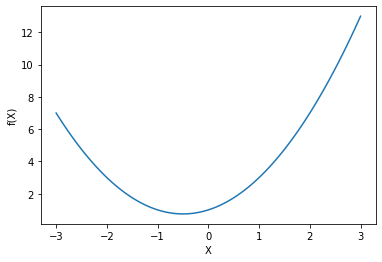

In [65]:
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1))


### Using gradient descent

In [66]:
def df(x):
    return x*2 + 1

In [69]:
new_x = 3
prev_x = 0
step_multi = 0.1
req_precision = 0.0001

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multi * gradient
    if abs(new_x - prev_x) < req_precision:
        break
print('Local minimum is at: ', new_x)
print('Value of the cost function here is: ', f(new_x))

Local minimum is at:  -0.49962781616118024
Value of the cost function here is:  0.7500001385208099
